# Back prop explanation using Binary Classification problem


### Load packages

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Load Iris dataset

In [12]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

### Visualize data

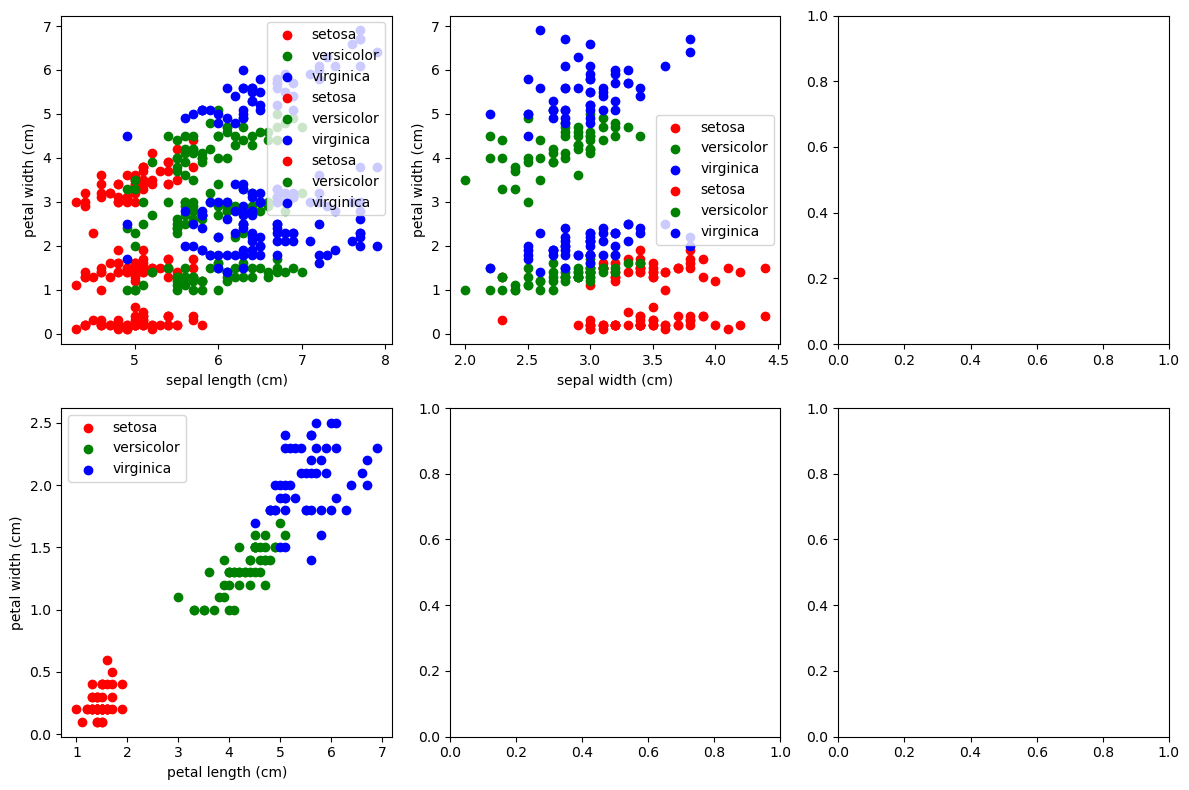

In [13]:
# Create a scatter plot for each pair of features
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
colors = ['red', 'green', 'blue']

for i in range(3):
    for j in range(i + 1, 4):
        ax[i // 2, i % 2].scatter(data[y == 0, i], data[y == 0, j], color=colors[0], label=target_names[0])
        ax[i // 2, i % 2].scatter(data[y == 1, i], data[y == 1, j], color=colors[1], label=target_names[1])
        ax[i // 2, i % 2].scatter(data[y == 2, i], data[y == 2, j], color=colors[2], label=target_names[2])
        ax[i // 2, i % 2].set_xlabel(iris.feature_names[i])
        ax[i // 2, i % 2].set_ylabel(iris.feature_names[j])
        ax[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()


### Prepare data 

In [14]:
y = (iris.target == 0).astype(int)  # 1 if Iris-setosa, 0 otherwise
y = y.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights, bias with random values and set learning rate
np.random.seed(0)
weights = 2 * np.random.random((4, 1)) - 1  # 4 for number of features
bias = 2 * np.random.random((1, 1)) - 1
alpha = 0.1

### Define helper functions

In [15]:
# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Cross-entropy loss function and its derivative
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(np.multiply(y_true, np.log(y_pred)) + np.multiply((1 - y_true), np.log(1 - y_pred)))

def cross_entropy_loss_derivative(y_true, y_pred):
    return -(np.divide(y_true, y_pred) - np.divide(1 - y_true, 1 - y_pred))

### Train the network

In [22]:
for epoch in range(10000):
    # Forward propagation
    z = np.dot(X_train, weights) + bias
    output = sigmoid(z)

    # Compute the error
    error = cross_entropy_loss(y_train, output)

    # Backward propagation

    d_output = cross_entropy_loss_derivative(y_train, output) * sigmoid_derivative(output)
    weights -= alpha * np.dot(X_train.T, d_output)
    bias -= alpha * np.sum(d_output, axis=0, keepdims=True)
    
    # Print error every 1000 epochs
    if epoch % 100 == 0:
        print('Epoch %d error: %.4f' % (epoch, error))

print("Training completed")

# Test the model
z_test = np.dot(X_test, weights) + bias
output_test = sigmoid(z_test)
predictions = output_test > 0.5
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 0 error: 0.0020
Epoch 100 error: 0.0020
Epoch 200 error: 0.0020
Epoch 300 error: 0.0019
Epoch 400 error: 0.0019
Epoch 500 error: 0.0019
Epoch 600 error: 0.0019
Epoch 700 error: 0.0019
Epoch 800 error: 0.0019
Epoch 900 error: 0.0019
Epoch 1000 error: 0.0019
Epoch 1100 error: 0.0018
Epoch 1200 error: 0.0018
Epoch 1300 error: 0.0018
Epoch 1400 error: 0.0018
Epoch 1500 error: 0.0018
Epoch 1600 error: 0.0018
Epoch 1700 error: 0.0018
Epoch 1800 error: 0.0018
Epoch 1900 error: 0.0018
Epoch 2000 error: 0.0018
Epoch 2100 error: 0.0017
Epoch 2200 error: 0.0017
Epoch 2300 error: 0.0017
Epoch 2400 error: 0.0017
Epoch 2500 error: 0.0017
Epoch 2600 error: 0.0017
Epoch 2700 error: 0.0017
Epoch 2800 error: 0.0017
Epoch 2900 error: 0.0017
Epoch 3000 error: 0.0017
Epoch 3100 error: 0.0016
Epoch 3200 error: 0.0016
Epoch 3300 error: 0.0016
Epoch 3400 error: 0.0016
Epoch 3500 error: 0.0016
Epoch 3600 error: 0.0016
Epoch 3700 error: 0.0016
Epoch 3800 error: 0.0016
Epoch 3900 error: 0.0016
Epoch 4000 e